
<font size = "5"> **Day 1: [Atomic Resolution STEM and Machine Learning](../MLSTEM2024.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

[Download](https://raw.githubusercontent.com/gduscher/MLSTEM2024//main/Day1/1_Aberrations.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MLSTEM2024/blob/main/Day1/1_Aberrations.ipynb)


# Electron Optic and Aberration Correction 

part of the workshop of 

<font size = "5"> **[Machine Learning in Transmission Electron Microscopy](../_MLSTEM.ipynb)**</font>


**Day1: Atomic Resolution STEM, Deep Convolutional Neural Networks, and Variational Auto Encoder**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Sergei Kalinin</td>
  </tr>
  <tr>
    <td colspan="2"><center>Microscopy Facilities</td> 
  </tr>
  
  <tr>
    <td colspan="2"><center>Materials Science & Engineering</td>
    <td></td>
  </tr>
  <tr>
    <td colspan="2"><center>Institute of Advanced Materials & Manufacturing</td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>
        
**June 2024**



## Import packages for figures and 
First we load the code to make figures from pyTEMlib
### Check Installed Packages

In [2]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.4.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
print('done')

installing pyTEMlib
done


### Load the plotting and figure packages

In [1]:
%matplotlib widget

import matplotlib.pylab as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

import pyTEMlib.animation as animate

import pyTEMlib.kinematic_scattering 
import scipy.special

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher


## Electron Meets Matter
To gather information about a sample the electron has to interact with
this sample, otherwise it would be invisible. There is a whole zoo of
interactions. The primary and most
important interaction for TEM imaging is (elastic and inelastic) scattering. All the other
processes are secondary (for example: X-ray emission).
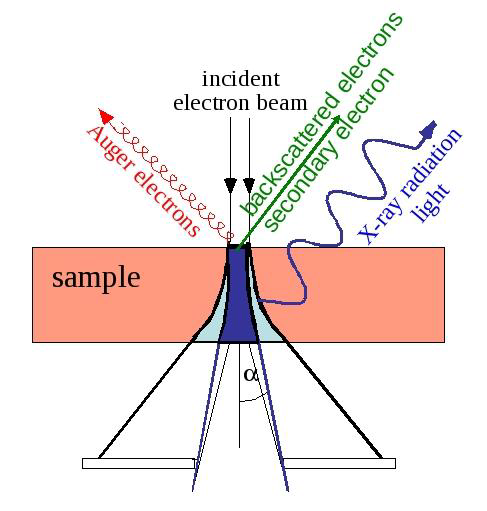

## Diffraction and Imaging

**No interaction**

Most electrons do not interact with a thin specimen at all.

**Interaction without energy transfer**

Elastic scattering is the basis for diffraction and imaging.

**Interaction with energy transfer**

Inelastic scattering causes a diffuse background in images and diffraction
pattern, but can be used for analytical TEM.

## Modes of a TEM

Some techniques:

|  |  |
|:----:|:---------|
|SAED |selected area electron diffraction|
|CBED| convergent beam electron diffraction|
|Kikuchi |Kikuchi diffraction|
|Fresnel |Fresnel diffraction|
|CTEM |conventional transmission electron microscopy|
|BF |bright field imaging|
|DF |dark field imaging|
|HRTEM| high resolution (phase contrast) |transmission electron microscopy|
|SE |secondary electron imaging|
|BE| backscatter electron imaging|
|Lorentz |Lorentz microscopy|
|HAADF |high angle annular dark field imaging (Z-contrast)|

## Modes of a TEM/STEM
| |illumination| objective| projective |I projective II|
|:---:|:---:|:---:|:---:|:---:|
|TEM |TEM | Mag|Image |ESI|
|Nanoprobe |Spot| Mag| Image| ESI|
|LowMag |TEM | LowMag| Image| ESI|
|Microprobe| Spot| LowMag| Image| ESI|
|SAED| TEM| Mag| Diffr| ESI|
|Low angle diffraction |TEM |LowMag| Diffr| ESI|
|CBED |Spot |Mag |Diffr| ESI|
|LACBED |Spot| LowMag| Diffr| ESI|
|Spectroscopy |TEM |Mag |Image| EELS|
|Spectroscopy |Spot| Mag |Diffr| EELS|
|STEM |Spot |Mag |Diffr| ESI|
|STEM-LM |Spot |LowMag| Diffr| ESI|
|STEM-SI| Spot| Mag| Diffr| EELS|


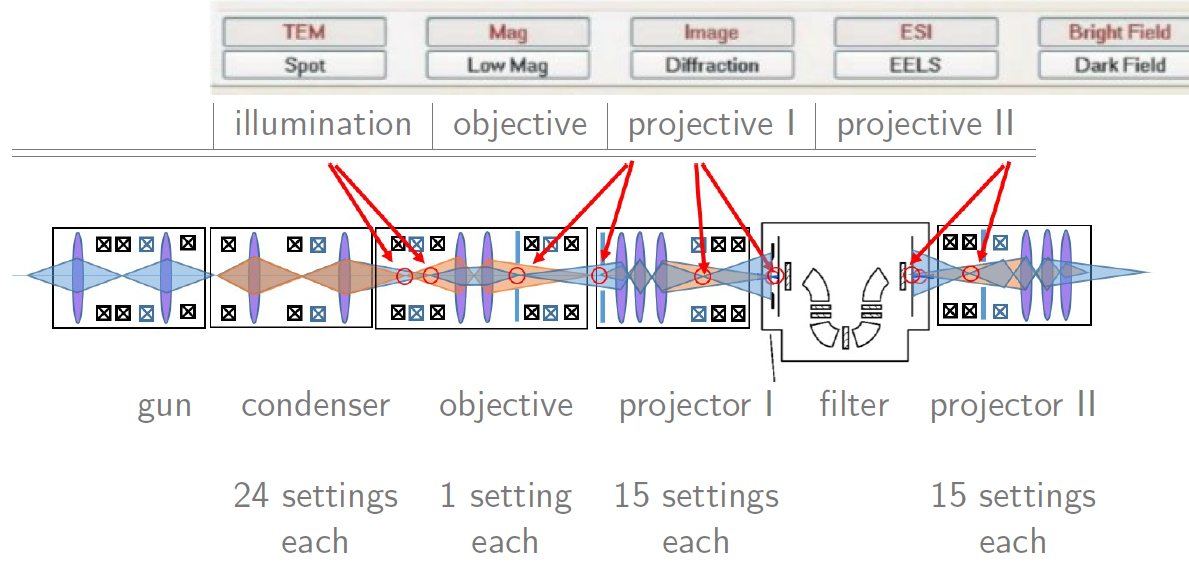

The main ingredients in an TEM method are how is the sample ``illuminated`` (condenser) and how are the electrons ``sorted`` and ``selected`` (projector and spectrometer).

## Geometric Ray Optic
Even though we are dealing with relativistic and quantum mechanical principles the geometric ray diagrams are essential for an understanding of how to set up a TEM mode.
To do the optical ray diagram we only have to concern ourselves with the lenses and the apertures.

Deflectors and stigmators (correcting multipoles) are only used to correct for mechanical misalignment of the optical axis. The correcting multipoles will be discussed in the phase contrast part of this lecture. The deflectors are important for scanning in STEM.

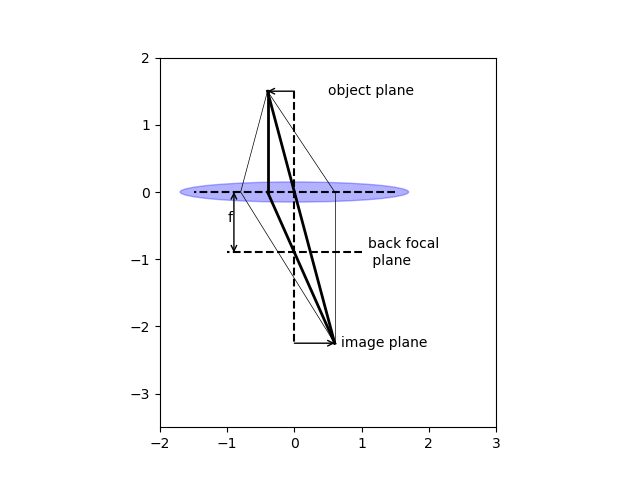

In [15]:
# ---INPUT------ #
focal_length = 0.9
# -------------- #

animate.geometric_ray_diagram(focal_length)

A lens is determined by:
- focal plane
- object plane
- image plane

### Magnification

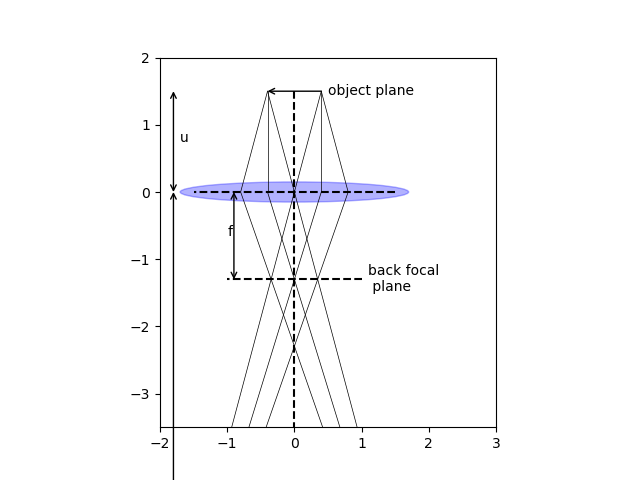

In [3]:
# ---INPUT------ #
focal_length = 1.3
# -------------- #

animate.geometric_ray_diagram(focal_length, magnification=True)

The magnification of a lens is given by Newton's law:
$$
\frac{1}{u}+\frac{1}{v} =\frac{1}{f}
$$

The magnification M is defined as
$$ 
M = \frac{v}{u}
$$

### Focus
The microscope consists of a
stack of lenses in which the
image plane of one lens is the
object plane of the next one.

The focal length $f$ of a
magnetic lens can be changed
by its electric current.

If the field is too weak, we call
it underfocus, is it too strong
we speak of overfocus.

![focus](images/focus.png)

### Convergence Angle

The condensor lens system defines the illumination of the sample and with it the convergence angle (even parallel illumination has ususally a convergence angle of a few $\mu$rad).

The convergence angle is set by the condenser lens system  and  can be measured with a convergent beam electron diffraction (CBED) pattern.


Under plane wave illumination the diffraction pattern consists of points. If you imagine a second incident plane wave
with some angle to the first one, there will be two slightly shifted diffraction patterns made out of points.


A lot of plane waves with a conical angle distribution will result in small circles instead of a point. The radius of the circle corresponds to the convergence angle. One can easily calculate the convergence angle from a CBED pattern of a known sample.

### Summary Ray Optics of TEM
- Lenses provide illumination and magnification
- Lenses switch modes in a TEM
- Lenses allow to select the angles within a TEM
- Apertures help to select the information projected in a TEM

A detailed understanding of the angles within the TEM allows for a
project oriented experimental setup.


## Resolution
Resolution is about distinguishing features.

The Intensity  of the Fraunhofer diffraction pattern of a circular aperture (the Airy pattern) is given by the squared modulus of the Fourier transform of the circular aperture:


$$I(\theta) = I_0 \left ( \frac{2 J_1(ka \sin \theta)}{ka \sin \theta} \right )^2 = I_0 \left ( \frac{2 J_1(x)}{x} \right )^2$$

with 
- $J_1$ being the [Bessel Function of the first kind of order one](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.j1.html#scipy.special.j1), 
- $k = {1}/{\lambda}$ is the wavenumber, 
- $a$ is the radius of the aperture, and 
- $\theta$ is the angle of observation, i.e. the angle between the axis of the circular aperture and the line between aperture center and observation point. 
- $x = ka \sin \theta $

The electron probe of a STEM is in first order an Airy pattern.

Below, we plot the normalized Airy pattern where we set $I_0$ to 1.

Please, change the ``seperation`` value to see the effect.

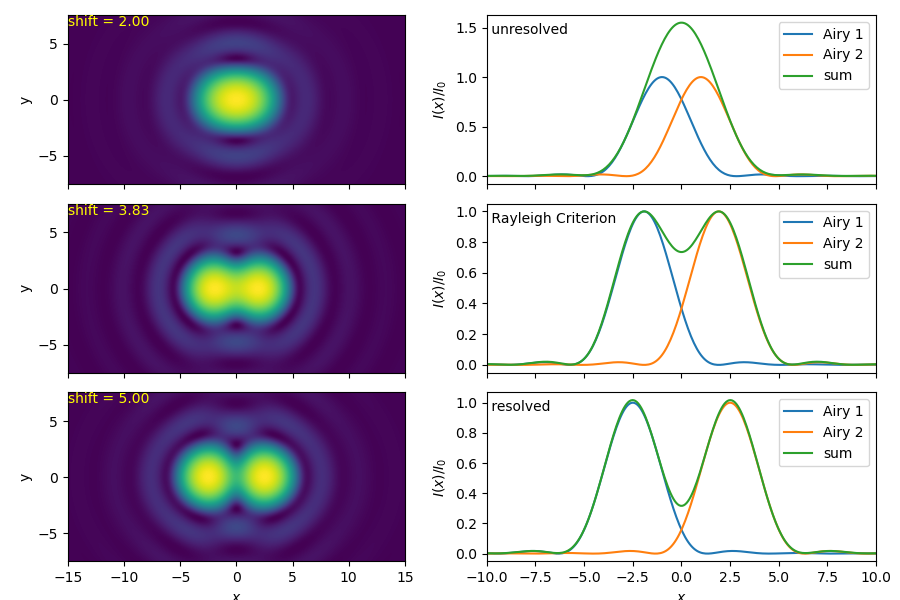

In [4]:
separation = [2,3.8317,5] # list of shit values
text= [' unresolved', ' Rayleigh Criterion', ' resolved']
gamma = 0.03       # gamma value for 2D plots
# The x-values we want
x = x1 = np.linspace(-15, 15, 400)

[x,y] = np.meshgrid(x1,x1);

fig,ax = plt.subplots(3,2, figsize=(9,6))
for i in range(3): 
    shift = separation[i]  
   
    ## image
    rr1 = np.sqrt((x+shift/2)**2+y**2)
    rr2 = np.sqrt((x-shift/2)**2+y**2)
    I1  = 4 * (scipy.special.j1(rr1) / rr1)**2
    I2 = 4 * (scipy.special.j1(rr2) / rr2)**2
    ax[i,0].imshow(np.log2(gamma+I2+I1)[100:300,:], extent =[x1[0],x1[-1],x1[100],x1[300]])
    ax[i,0].text(x1[0],x1[300],f'shift = {shift:.2f}', color = 'yellow', verticalalignment = 'top');
    ax[i,0].set_ylabel('y')
    
    ## intensity plot
    norm_I1 = 4 * (scipy.special.j1((x1+shift/2)) / (x1+shift/2))**2
    norm_I2 = 4 * (scipy.special.j1((x1-shift/2)) / (x1-shift/2))**2
    ax[i,1].plot(x1, norm_I1, label='Airy 1')
    ax[i,1].plot(x1, norm_I2, label='Airy 2')
    ax[i,1].plot(x1, norm_I1+norm_I2, label='sum')
    ax[i,1].set_xlim(-10,10)
    _,ymax = ax[i,1].get_ylim()
    ax[i,1].text(-10,ymax*.95,text[i], color = 'black', verticalalignment = 'top');
    
    ax[i,1].set_ylabel('$I(x)/I_0$')
    ax[i,1].legend();
    
    if i<2:
        ax[i,0].xaxis.set_ticklabels([])
        ax[i,1].xaxis.set_ticklabels([])
plt.tight_layout();

ax[2,0].set_xlabel('$x$')
ax[2,1].set_xlabel('$x$');

## Point Resolution 

The **Rayleigh Criterion** gives us the point resolution, which is the distance two objects have to be seperated to be distinguished (without prior knowledge of the shape). This Rayleigh criterion is based on the first zero fo the Bessel function $J_1(x)$, which occurs at $x+0 = k a \sin \theta ≈ 3.8317$.

This will give the well know form of the Rayleigh Criterion for the angular resolution limit $\theta_R$:

$$ \sin \theta_R \approx \frac{3.83}{ka} = \frac{3.83 \lambda}{2 \pi a} = 1.22 \frac{\lambda}{2a} = 1.22 \frac{\lambda}{d}$$

with:
- $\lambda$: wavelength
- $a$: aperture radius
- $d$: aperture diameter


If one knows the shape and/or size of the objects one can determine features seperated less than the resolution limit. This is known as the information limit.


In [5]:
acceleration_voltage = 200*1e3 # in eV
d = 1  # in 1/nm

lambda_e = pyTEMlib.kinematic_scattering .get_wavelength(acceleration_voltage)
theta_R = lambda_e/d

print(f'angular resolution {theta_R*1000:.1f} mrad')

angular resolution 25.1 mrad


## Lens Aberrations

This theoretical resolution of the de Broglie Wavelength as discussed in the [Resolution Notebook](./CH3_01-Resolution.ipynb) is not achieved so far, because electro-magnetic lenses are as bad as
* bottom of champagne bottle (Europe)
* bottom of coke bottle (US)

> **We need to look into the aberrations of lenses if we want to understand resolution in the TEM**

### Schematic of Aberration

An ideal lens converges all rays going through the lens parallel to the optical axis in the focal point. 

The wavefront is laying on a circle, meaning all rays are perpendicular to the tagent of a sphere centered at the focal point. (press ideal rays below)

Aberrated rays of a certain distance (and angle in cylindrical coordinates) to the optical axis cut the optic axis at a point which is not the focal point and lay on a sphere with the center at that point. (press aberrated rays in figure below to visualize)

In the case of spherical aberration the point of rays cutting the optical axis with distance
will move more and more away from the focal point. The projection of that aberration is an ellipse. (as shown below with aberration wavefront pressed)

The difference between the ideal (spherical) wavefront and the aberrated one is directly related  to the aberration function.( which is schematically visualized if aberration function is pressed below)

Box(children=(ToggleButton(value=False, description='ideal rays'), ToggleButton(value=False, description='aber…

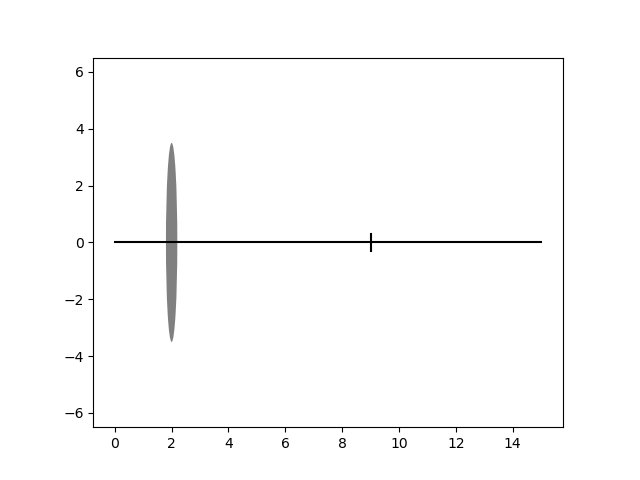

In [6]:
view_i = pyTEMlib.animation.InteractiveAberration()

### Notation of Aberrations
The notations of the coefficients $C_{m,n}$ of the aberration function $\chi$ is defined according to [Krivanek et al. 2009]((https://www.taylorfrancis.com/chapters/edit/10.1201/9781420045550-12/aberration-correction-electron-microscopy-ondrej-krivanek-niklas-dellby-matthew-murfitt?context=ubx&refId=61e7b2b9-aba4-4718-a7ce-c0982d0f1b60)) with slight modifications compared to  the original article [Krivanek et al. 1999](https://doi.org/10.1016/S0304-3991(99)00013-3):

| Notation | Order of ray aberr. | Order of wave aberr. | Name | Symmetry |
| --- | --- | --- | --- | --- |
|C$_{01A}$ | 0 | 1 | Probe/image shift in x direction | 1-fold|
|C$_{01B}$ | 0 | 1 | Probe/image shift in y direction | 1-fold|
|C$_{1}$   | 1 | 2 | Defocus                    | Rotational|
|C$_{12}$  | 1 | 2 | Astigmatism                | 2-fold|
|C$_{21}$  | 2 | 3 | Coma                       | 1-fold|
|C$_{23}$  | 2 | 3 | 3-fold astigmatism         | 3-fold|
|C$_{3}$   | 3 | 4 | Spherical aberration (C$_s$)| Rotational|
|C$_{32}$  | 3 | 4 | 2--fold astig of C$_s$     | 3-fold|
|C$_{34}$  | 3 | 4 | 4--fold astig of C$_s$     | 3-fold|

I am using that notation because the Nion dedicated STEMs use this notation.

Because we only use small angles close to the optical axis, we only have to consider the axial aberrations (both in STEM and HRTEM).

With the above notation the (axial) aberration function is expressed in spherical coordinates as:
$$
\chi(\theta, \phi) 
= \{ \theta [ C_{01A}\cos(\phi)+C_{01B}\sin(\phi)]\\
+  \frac{\theta^2}{2}[C_1+C_{12A}\cos(2\phi)+C_{12B}\sin(2\phi)]+\nonumber \\
+ \frac{\theta^3}{3}[C_{21A}\cos(\phi)+C_{21B}\sin(\phi)+
C_{23A}\cos(3\phi)+C_{23B}\sin(3\phi)]+\nonumber \\
+ \frac{\theta^4}{4}[C_3+C_{32A}\cos(2\phi)+C_{32B}\sin(2\phi)+
C_{34A}\cos(4\phi)+C_{34B}\sin(4\phi)]+ \nonumber\\
+ ...\}\nonumber
$$
which is equivalent to:

$$
\chi(\theta, \phi) = \sum_m \theta^{m+1} *\frac{1}{m+1} * \sum_{n} C_{m,n,a}  \cos(n*\phi) + C_{m,n,b} \sin(n*\phi) 
$$

> you notice that $m$ is the order of aberration +1
>
### Aberrations of a (Non-Corrected) TEM

We set typical values for our TEM (Zeiss Libbra 200MC)


In [7]:
acceleration_voltage_V = 200*1e3 # Microscope voltage in V
C_s = 2.2     # Spherical abberation coefficient in mm
defocus = -90 # Microscope defocus in nm
C_c = 2.0     # Chromatic abberation coefficient in mm

### Aberration Function $\chi$

Two different convention are used for aberration coefficients one by [Krivanek et al. 2009](https://www.taylorfrancis.com/chapters/edit/10.1201/9781420045550-12/aberration-correction-electron-microscopy-ondrej-krivanek-niklas-dellby-matthew-murfitt?context=ubx&refId=61e7b2b9-aba4-4718-a7ce-c0982d0f1b60) and by [Haider et al. 2008](https://doi.org/10.1016/j.ultramic.2007.07.007) 

With the main aberration coefficients $C_{n,m}$:

Krivanek et al. | Haider et al. | Name
 ----------------|------------- | -------------
 $C_{10}$ | $C_1$ |defocus
 $C_{12a}$, $C_{12b}$  | $A_1$ |astigmatism
 $C_{21a}$, $C_{21b}$  | $B_2$ |coma
 $C_{23a}$, $C_{23b}$  | $A_2$ |three-fold astigmatism
 $C_{30}$  | $C_3$ |spherical aberration
    
As before the aberration function $\chi$ in polar coordinates (of angles) $\theta$ and $\phi$ is defined according to [Krivanek et al.](https://doi.org/10.1016/S0304-3991(99)00013-3):

$$
\chi(\theta, \phi) = \sum_n \theta^{n+1} *\frac{1}{n+1} * \sum_{n} C_{n,m,a}  \cos(m*\phi) + C_{n,m,b} \sin(m*\phi) 
$$

with:
- $n$: order ($n=0,1,2,3,...$)
- $m$: symmetry  (or multiplicity) $m = ..., n+1$;  
    - $m$ is all odd   for n = even
    - $m$ is all even  for n = odd

The coefficients aer also often expressed as complex number like $C_{n,m} = C_{n,m,a} +i C_{n,m,b}$
    

In the following we program the equation above just as seen. The terms are divided into the theta (line 22) and the sum part (line 33).  The product of these two terms is summed in line 39.

We assume that the aberrations are given up to fifth order.




## Measuring Aberrations

There are two methods to determine aberrations currently used:
* method of Zemlin tableau [zEMLIN ET AL. 1978](https://doi.org/10.1016/S0304-3991(78)80006-0) and 
* Ronchigram method by [Lupini et al.2010](https://doi.org/10.1016/j.ultramic.2010.04.006). In this Ronchi

The Ronchigram method is based on the magnification of the Ronchigram with distance from the center (Jacobian matrix of aberration function) and can be determined from a single measurement.
We will discuss this more in the ROnchigram notebook later.

### Zemlin Tableau 
The Zemlin tabelau retrieves the aberration function from a tilt series in which the defocus and astigmatism are determined for each tilt angle.
Each (modified) aberration function for each tilt angle $\tau$ is associated with an effective defocus $\tilde{C}$ and effective astigmatism $\tilde{A}_1$ that can be correlated with higher order aberrations:
$$
\tilde{C}(\tau) = C_1 + 4 \Re[\tau B_2] + 2\tau \bar{\tau} C_3 + 4 \Re[\tau^2 S_3] + 12 \Re[\tau^2 \bar{\tau} B_4] + 8 \Re[\tau^3 D4] + 3(\tau \bar{\tau})^2 C_5
$$
and
$$
\tilde{A}_1(\tau) = A_1 + 2\tau\bar{B}_2 + 2\bar{\tau} A_2 + \tau^2 C_3+ 6 \tau \bar{\tau} \bar{S}_3 + 
3\bar{\tau}^2 A_3 + \tau^3 B_4+ 6 \tau^2 \bar{\tau} \bar{B}_4+
 + 12 \tau \bar{\tau}^2 \bar{D}_4  +
 + 4\bar{\tau}^3 A_4 + 2\tau^3 \tau C_5 + 5 \bar{\tau}^4 \bar{A}_5
$$


Now we have to dermine the defocus and astigmatism for a STEM image.
To do that we need to acquire an image at zero defocus change and compare that to images in under- and overfocus. 
The smearing of the over and underfocus will get us the astigmatism and defocus if we have enough contrasty edges in the sample.

Gold particles on carbon are the ususal choice for an alignment sample. 

A defocus will result in more smearing further away from the exact focus while less smearing means we are closer to focus.
If the smearing is equl sized in under- and over-focused images the defocus is perfect.
The smearing in a STEM image can be eliptical which represents astigmatism. Angle and long axis of the oval will be determined and astigmatism can be quantified.

An impression of how this astigmatism and defocus represent higher oreder aberrations is given in the image below:

![Zemlin](images/aberr-tableau.gif)

Please note the defocus change in $B_2$ and $S_3$ which does not occur in $A_2$, and $A_3$


## Navigation
- <font size = "3">  **Back  [Course Organization](CH1_05-Course_Organization.ipynb)** </font>
- <font size = "3">  **Next: [Electron_Optics](CH1_07-Electron_Optics.ipynb)** </font>
- <font size = "3">  **Chapter 1: [Introduction](CH1_00-Introduction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>